In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data_files = ['trainData1.csv', 'trainData2.csv', 'trainData3.csv', 'trainData4.csv', 'trainData5.csv']
train_data = pd.concat([pd.read_csv(file, header=None) for file in train_data_files], ignore_index=True)
train_label_files = ['trainLabels1.csv', 'trainLabels2.csv', 'trainLabels3.csv', 'trainLabels4.csv', 'trainLabels5.csv']
train_labels = pd.concat([pd.read_csv(file, header=None) for file in train_label_files], ignore_index=True)

In [3]:
train_labels.shape

(500, 1)

In [3]:
train_data.shape

(500, 64)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,11,0,16,0,0,0,4,0,...,0,0,0,0,0,0,3,5,0,0
1,0,0,9,16,16,16,0,0,0,0,...,5,0,3,0,15,13,10,3,0,16
2,9,16,15,10,16,16,0,0,16,13,...,16,16,0,16,16,7,16,16,16,3
3,0,0,0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,0,5,0,14,16,0,0,0,0,0,...,15,0,0,3,0,9,0,8,0,0


In [5]:
train_labels.head()

,0
0,6
1,5
2,6
3,5
4,6


In [4]:
test_data = pd.read_csv('testData.csv',header =None)
test_labels = pd.read_csv('testLabels.csv',header =None)

In [5]:
test_data.shape

(110, 64)

In [9]:
test_labels.shape

(110, 1)

In [154]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(test_labels.isnull().sum())
print(train_labels.isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64
0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64
0    0
dtype: int64
0    0
dtype: int64


In [6]:
X_train = train_data.values  
y_train = train_labels.values.ravel()

X_test = test_data.values  
y_test = test_labels.values.ravel()  

In [7]:
# Recode labels: map 5 to 0 and 6 to 1
y_train_binary = np.where(y_train == 5, 0, 1)
y_test_binary = np.where(y_test == 5, 0, 1)

print("Unique values in y_train_binary:", np.unique(y_train_binary))
print("Unique values in y_test_binary:", np.unique(y_test_binary))

Unique values in y_train_binary: [0 1]
Unique values in y_test_binary: [0 1]


In [157]:
#standardization
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)


std_train[std_train == 0] = 1

X_train_standardized = (X_train - mean_train) / std_train


X_test_standardized = (X_test - mean_train) / std_train


X_train_intercept = np.c_[np.ones(X_train_standardized.shape[0]), X_train_standardized]
X_test_intercept = np.c_[np.ones(X_test_standardized.shape[0]), X_test_standardized]

In [99]:
#that was my first attempt without standardization
#X_train_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
#X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

# Question 1

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights, bias):
    m = len(y)
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    epsilon = 1e-5 
    
    
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost


def predict(X, weights, bias):
    probabilities = sigmoid(np.dot(X, weights) + bias)
    return [1 if prob >= 0.5 else 0 for prob in probabilities]


def gradient_descent(X_train, y_train, X_test, y_test, weights, bias, learning_rate=0.1, max_epochs=100, tol=1e-5):
    m_train = len(y_train)
    train_loss_history = []
    test_loss_history = []
    train_error_history = []
    test_error_history = []
    
    for epoch in range(max_epochs):
        z_train = np.dot(X_train, weights) + bias
        h_train = sigmoid(z_train)
        
        dw = (1/m_train) * np.dot(X_train.T, (h_train - y_train))
        db = (1/m_train) * np.sum(h_train - y_train)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute losses
        train_loss = cost_function(X_train, y_train, weights, bias)
        test_loss = cost_function(X_test, y_test, weights, bias)
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        
        # Compute errors (misclassification percentage)
        y_train_pred = predict(X_train, weights, bias)
        y_test_pred = predict(X_test, weights, bias)
        train_error = np.mean(np.array(y_train_pred) != y_train) * 100
        test_error = np.mean(np.array(y_test_pred) != y_test) * 100
        train_error_history.append(train_error)
        test_error_history.append(test_error)
        
        # Check for convergence
        if epoch > 0:
            loss_diff = abs(train_loss_history[epoch] - train_loss_history[epoch - 1])
            if loss_diff < tol:
                print(f"Converged at epoch {epoch} with loss difference {loss_diff}")
                break
            
        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Error: {train_error:.2f}%, Test Error: {test_error:.2f}%")
            
        if epoch == max_epochs - 1:
            print(f"Final Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Error: {train_error:.2f}%, Test Error: {test_error:.2f}%")

    return weights, bias, train_loss_history, test_loss_history, train_error_history, test_error_history




In [12]:
# Initialize parameters for gradient descent
m, n = X_train.shape  # m = number of examples, n = number of features
learning_rate = 0.01 
max_epochs = 100 
tolerance = 1e-5 

weights = np.zeros(n)
bias = 0


weights, bias, train_loss_history, test_loss_history, train_error_history, test_error_history = gradient_descent(
    X_train, y_train_binary, X_test, y_test_binary, 
    weights, bias, learning_rate, max_epochs, tol=tolerance)


print(f"Final Weights (w): {weights}")
print(f"Final Bias (w0): {bias}")

Epoch 0, Train Loss: 0.6044, Test Loss: 0.5995, Train Error: 25.40%, Test Error: 29.09%
Epoch 10, Train Loss: 2.9887, Test Loss: 3.4369, Train Error: 44.20%, Test Error: 41.82%
Epoch 20, Train Loss: 2.1270, Test Loss: 2.7173, Train Error: 33.20%, Test Error: 36.36%
Epoch 30, Train Loss: 1.7705, Test Loss: 2.3697, Train Error: 29.60%, Test Error: 34.55%
Epoch 40, Train Loss: 1.5988, Test Loss: 2.1838, Train Error: 27.20%, Test Error: 32.73%
Epoch 50, Train Loss: 1.4646, Test Loss: 2.0280, Train Error: 25.00%, Test Error: 30.00%
Epoch 60, Train Loss: 1.3596, Test Loss: 1.9023, Train Error: 24.00%, Test Error: 27.27%
Epoch 70, Train Loss: 1.2766, Test Loss: 1.8026, Train Error: 23.20%, Test Error: 27.27%
Epoch 80, Train Loss: 1.2071, Test Loss: 1.7191, Train Error: 22.60%, Test Error: 26.36%
Epoch 90, Train Loss: 1.1479, Test Loss: 1.6478, Train Error: 22.20%, Test Error: 26.36%
Final Epoch 100, Train Loss: 0.8740, Test Loss: 0.5546, Train Error: 19.80%, Test Error: 13.64%
Final Weights (

In [16]:
X_train.shape

(500, 64)

# Question 2

In [13]:
def plot_results(train_loss_history, test_loss_history, train_error_history, test_error_history):
    epochs = range(len(train_loss_history))
    
    plt.figure(figsize=(12, 8))
    
    # Plot test error vs epochs
    plt.subplot(2, 2, 1)
    plt.plot(epochs, test_error_history, label='Test Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.title('Test Error vs Epochs')
    plt.legend()

    # Plot training error vs epochs
    plt.subplot(2, 2, 2)
    plt.plot(epochs, train_error_history, label='Training Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.title('Training Error vs Epochs')
    plt.legend()

    # Plot test loss vs epochs
    plt.subplot(2, 2, 3)
    plt.plot(epochs, test_loss_history, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Test Loss vs Epochs')
    plt.legend()

    # Plot training loss vs epochs
    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_loss_history, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

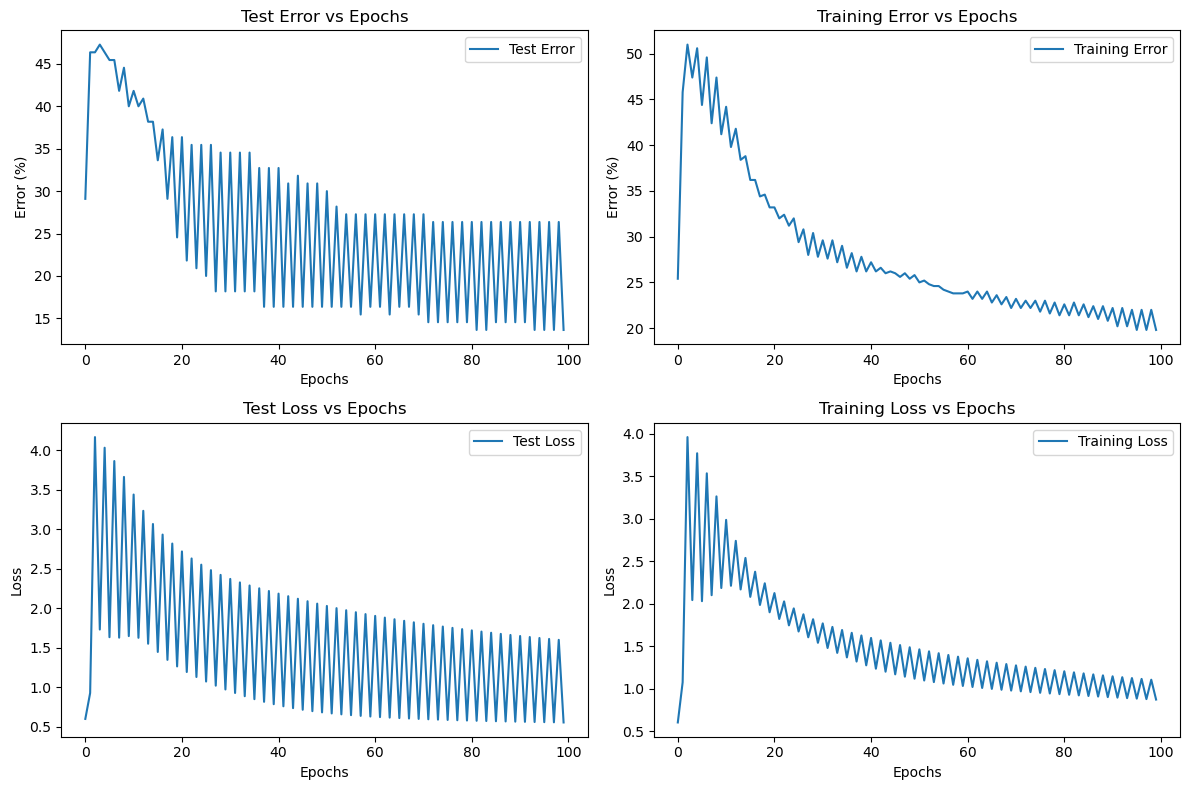

In [14]:
plot_results(train_loss_history, test_loss_history, train_error_history, test_error_history)

# Question 3

In [183]:
# Cost function with regularization (negative log-likelihood with L2)
def cost_function(X, y, weights, bias, lambda_):
    m = len(y)
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    epsilon = 1e-5  # To avoid log(0)
    
    # Logistic regression cost (negative log-likelihood)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    
    # Add regularization term (excluding bias)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(weights))
    cost += regularization_term
    return cost

# Gradient Descent with regularization and convergence check
def gradient_descent(X_train, y_train, X_test, y_test, weights, bias, learning_rate=0.1, max_epochs=100, tol=1e-5, lambda_=0.5):
    m_train = len(y_train)
    train_loss_history = []
    test_loss_history = []
    train_error_history = []
    test_error_history = []
    
    for epoch in range(max_epochs):
        # Compute predictions
        z_train = np.dot(X_train, weights) + bias
        h_train = sigmoid(z_train)
        
        # Compute gradients with L2 regularization (excluding bias term)
        dw = (1/m_train) * np.dot(X_train.T, (h_train - y_train)) + (lambda_ / m_train) * weights
        db = (1/m_train) * np.sum(h_train - y_train)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute losses
        train_loss = cost_function(X_train, y_train, weights, bias, lambda_)
        test_loss = cost_function(X_test, y_test, weights, bias, lambda_)
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        
        # Compute errors (misclassification percentage)
        y_train_pred = predict(X_train, weights, bias)
        y_test_pred = predict(X_test, weights, bias)
        train_error = np.mean(np.array(y_train_pred) != y_train) * 100
        test_error = np.mean(np.array(y_test_pred) != y_test) * 100
        train_error_history.append(train_error)
        test_error_history.append(test_error)
        
        # Check for convergence
        if epoch > 0:
            loss_diff = abs(train_loss_history[epoch] - train_loss_history[epoch - 1])
            if loss_diff < tol:
                print(f"Converged at epoch {epoch} with loss difference {loss_diff}")
                break
            
        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Error: {train_error:.2f}%, Test Error: {test_error:.2f}%")

        if epoch == max_epochs - 1:
            print(f"Final Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Error: {train_error:.2f}%, Test Error: {test_error:.2f}%")
    return weights, bias, train_loss_history, test_loss_history, train_error_history, test_error_history


In [184]:
# Initialize parameters for gradient descent
m, n = X_train_intercept.shape  # m = number of examples, n = number of features
learning_rate = 0.01  
max_epochs = 100  
tolerance = 1e-5  

# Initialize weights and bias
weights = np.zeros(n)
bias = 0

In [185]:
# Train with λ = 0.5
lambda_1 = 0.5
weights_1, bias_1, train_loss_history_1, test_loss_history_1, train_error_history_1, test_error_history_1 = gradient_descent(
    X_train_intercept, y_train_binary, X_test_intercept, y_test_binary, 
    weights.copy(), bias, learning_rate, max_epochs, tol=tolerance, lambda_=lambda_1)

Epoch 0, Train Loss: 0.6906, Test Loss: 0.6912, Train Error: 30.40%, Test Error: 35.45%
Epoch 10, Train Loss: 0.6673, Test Loss: 0.6705, Train Error: 24.20%, Test Error: 31.82%
Epoch 20, Train Loss: 0.6468, Test Loss: 0.6488, Train Error: 21.00%, Test Error: 27.27%
Epoch 30, Train Loss: 0.6282, Test Loss: 0.6281, Train Error: 19.40%, Test Error: 26.36%
Epoch 40, Train Loss: 0.6114, Test Loss: 0.6088, Train Error: 18.00%, Test Error: 20.91%
Epoch 50, Train Loss: 0.5961, Test Loss: 0.5912, Train Error: 16.60%, Test Error: 17.27%
Epoch 60, Train Loss: 0.5821, Test Loss: 0.5751, Train Error: 15.80%, Test Error: 15.45%
Epoch 70, Train Loss: 0.5694, Test Loss: 0.5603, Train Error: 15.40%, Test Error: 14.55%
Epoch 80, Train Loss: 0.5577, Test Loss: 0.5469, Train Error: 15.00%, Test Error: 14.55%
Epoch 90, Train Loss: 0.5470, Test Loss: 0.5345, Train Error: 14.60%, Test Error: 13.64%
Final Epoch 100, Train Loss: 0.5381, Test Loss: 0.5242, Train Error: 14.00%, Test Error: 13.64%


In [186]:
# Train with λ = 1.0
lambda_2 = 1.0
weights_2, bias_2, train_loss_history_2, test_loss_history_2, train_error_history_2, test_error_history_2 = gradient_descent(
    X_train_intercept, y_train_binary, X_test_intercept, y_test_binary, 
    weights.copy(), bias, learning_rate, max_epochs, tol=tolerance, lambda_=lambda_2)

Epoch 0, Train Loss: 0.6906, Test Loss: 0.6912, Train Error: 30.40%, Test Error: 35.45%
Epoch 10, Train Loss: 0.6673, Test Loss: 0.6705, Train Error: 24.20%, Test Error: 31.82%
Epoch 20, Train Loss: 0.6468, Test Loss: 0.6488, Train Error: 21.00%, Test Error: 27.27%
Epoch 30, Train Loss: 0.6282, Test Loss: 0.6281, Train Error: 19.40%, Test Error: 26.36%
Epoch 40, Train Loss: 0.6114, Test Loss: 0.6089, Train Error: 18.00%, Test Error: 20.91%
Epoch 50, Train Loss: 0.5961, Test Loss: 0.5913, Train Error: 16.60%, Test Error: 17.27%
Epoch 60, Train Loss: 0.5822, Test Loss: 0.5752, Train Error: 15.80%, Test Error: 15.45%
Epoch 70, Train Loss: 0.5694, Test Loss: 0.5606, Train Error: 15.40%, Test Error: 14.55%
Epoch 80, Train Loss: 0.5578, Test Loss: 0.5472, Train Error: 15.00%, Test Error: 14.55%
Epoch 90, Train Loss: 0.5471, Test Loss: 0.5349, Train Error: 14.60%, Test Error: 13.64%
Final Epoch 100, Train Loss: 0.5382, Test Loss: 0.5247, Train Error: 14.00%, Test Error: 13.64%


# Question 4

In [187]:
def plot_results(train_loss_history, test_loss_history, train_error_history, test_error_history, lambda_):
    epochs = range(len(train_loss_history))
    
    plt.figure(figsize=(12, 8))
    
    # Plot test error vs epochs
    plt.subplot(2, 2, 1)
    plt.plot(epochs, test_error_history, label=f'Test Error (λ={lambda_})')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.title(f'Test Error vs Epochs (λ={lambda_})')
    plt.legend()

    # Plot training error vs epochs
    plt.subplot(2, 2, 2)
    plt.plot(epochs, train_error_history, label=f'Training Error (λ={lambda_})')
    plt.xlabel('Epochs')
    plt.ylabel('Error (%)')
    plt.title(f'Training Error vs Epochs (λ={lambda_})')
    plt.legend()

    # Plot test loss vs epochs
    plt.subplot(2, 2, 3)
    plt.plot(epochs, test_loss_history, label=f'Test Loss (λ={lambda_})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Test Loss vs Epochs (λ={lambda_})')
    plt.legend()

    # Plot training loss vs epochs
    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_loss_history, label=f'Training Loss (λ={lambda_})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss vs Epochs (λ={lambda_})')
    plt.legend()

    plt.tight_layout()
    plt.show()


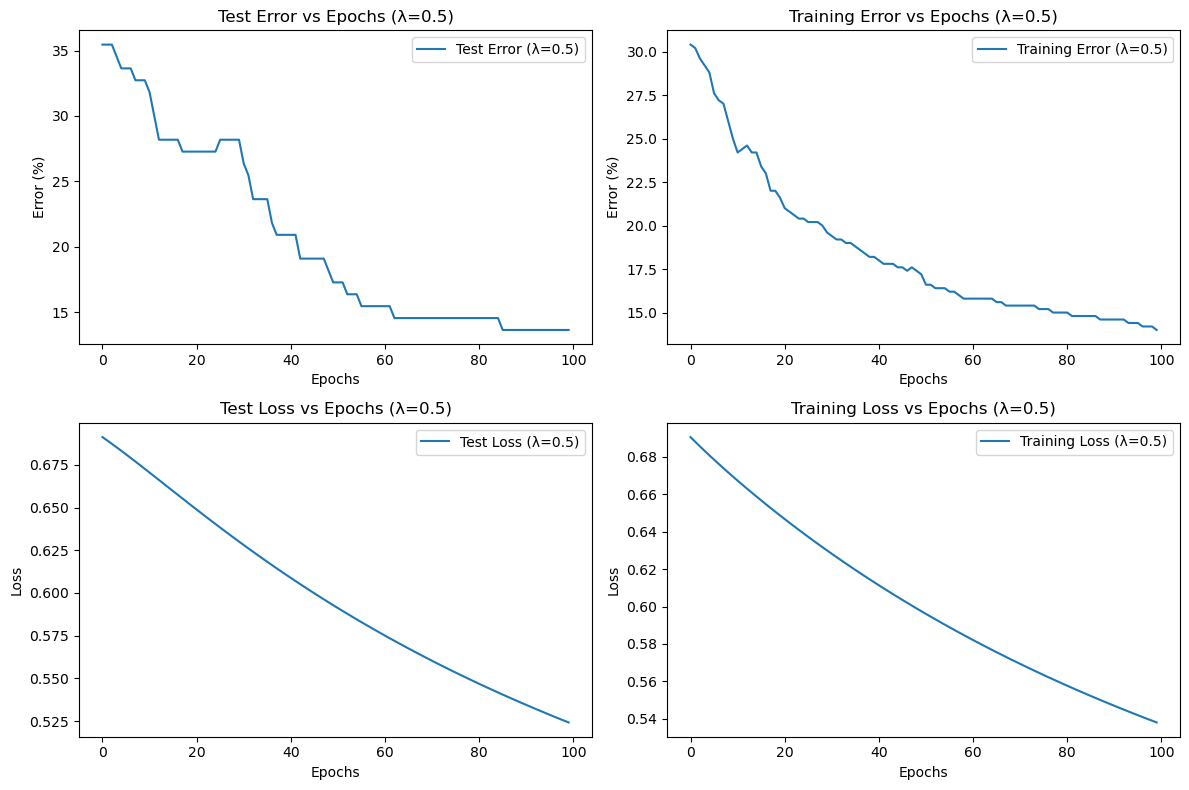

In [188]:
# Plot the results for λ = 0.5
plot_results(train_loss_history_1, test_loss_history_1, train_error_history_1, test_error_history_1, lambda_1)


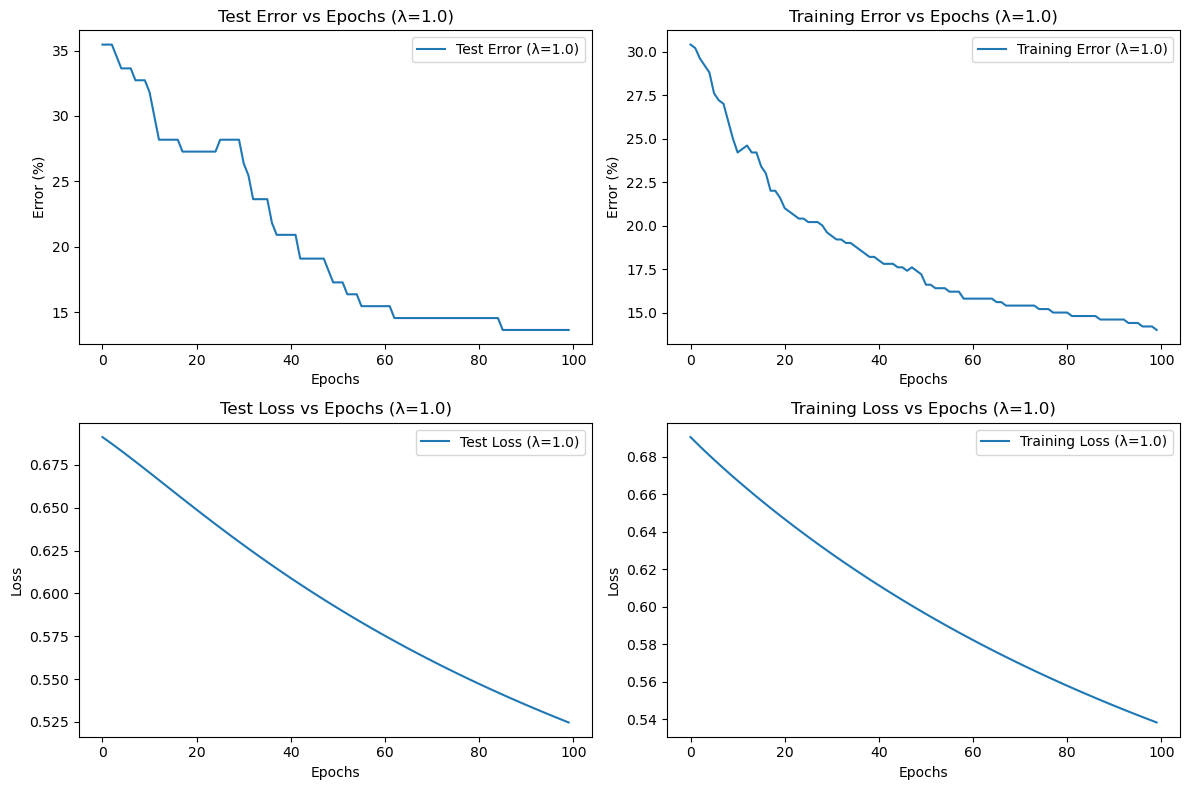

In [139]:
# Plot the results for λ = 1.0
plot_results(train_loss_history_2, test_loss_history_2, train_error_history_2, test_error_history_2, lambda_2)


In [189]:
# Print final parameters w, w0 for both λ values
print(f"Final Weights (w) for λ=0.5: {weights_1}")
print(f"Final Bias (w0) for λ=0.5: {bias_1}")
print(f"Final Weights (w) for λ=1.0: {weights_2}")
print(f"Final Bias (w0) for λ=1.0: {bias_2}")

Final Weights (w) for λ=0.5: [-0.00791019  0.00421886  0.00695254 -0.06825378 -0.01754925 -0.07690247
 -0.11951652 -0.03446296  0.00322805 -0.02397601 -0.048243   -0.06846687
  0.01012993 -0.0454622  -0.09111483 -0.01460114  0.00911977 -0.00384553
 -0.04682784 -0.01369734  0.03737056 -0.03912796  0.00982162  0.01347672
  0.01865912 -0.01226299 -0.03936263  0.01578396 -0.05054753 -0.0429739
 -0.02465292  0.01852975 -0.01002195 -0.00467257  0.0220002   0.09261348
  0.03692768  0.0183392   0.01753315 -0.00209627  0.01329417  0.01210464
  0.01419489  0.15879929  0.09411213  0.01090902  0.01472556  0.06351289
 -0.01074503  0.00628687  0.01178571  0.0539258   0.05537551 -0.04325053
  0.04978402  0.10441014  0.00465442  0.00793512  0.00253067 -0.08956347
 -0.02688209  0.05632654  0.09362577  0.03362843  0.01069548]
Final Bias (w0) for λ=0.5: -0.007914426292455484
Final Weights (w) for λ=1.0: [-0.00790627  0.00421756  0.00694985 -0.0682221  -0.01754028 -0.07686686
 -0.1194604  -0.03444626  0.0